In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 1. Read Data

In [52]:
csv_file = "E:\Project\KStyle\Solution_2\Dataset.csv"
df = pd.read_csv(csv_file, delimiter=',')

# Save as Excel File
excel_file = "Dataset_excel.xls"
df.to_excel(excel_file, index=False, engine='openpyxl')

In [53]:
# Displays the first five rows of the dataset
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0,NaN,5-10,69,1009,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,NaN,5-10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5-10,76,78,75


In [54]:
# Get how many rows and columns
df.shape

(30641, 15)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           30641 non-null  object
 1   Gender               30639 non-null  object
 2   EthnicGroup          28799 non-null  object
 3   ParentEduc           28794 non-null  object
 4   LunchType            30639 non-null  object
 5   TestPrep             28809 non-null  object
 6   ParentMaritalStatus  29449 non-null  object
 7   PracticeSport        30008 non-null  object
 8   IsFirstChild         29735 non-null  object
 9   NrSiblings           29068 non-null  object
 10  TransportMeans       27505 non-null  object
 11  WklyStudyHours       29684 non-null  object
 12  MathScore            30639 non-null  object
 13  ReadingScore         30639 non-null  object
 14  WritingScore         30639 non-null  object
dtypes: object(15)
memory usage: 3.5+ MB


### Step 2. Drop Unnecessary Data

In [56]:
# Drops the column named "Unnamed: 0" because it doesn't contain important features
df.drop("Unnamed: 0", axis=1, inplace=True)

In [57]:
# Calculates the total number of missing (NaN) values in each column
nan_value = df.isna().sum()
nan_value

Gender                    2
EthnicGroup            1842
ParentEduc             1847
LunchType                 2
TestPrep               1832
ParentMaritalStatus    1192
PracticeSport           633
IsFirstChild            906
NrSiblings             1573
TransportMeans         3136
WklyStudyHours          957
MathScore                 2
ReadingScore              2
WritingScore              2
dtype: int64

In [58]:
# Drop all the NaN value
df = df.dropna()
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [59]:
# Get how many rows and columns
# The data has decreased by almost 50%
# This is still okay because the remaining amount of data is still very large
df.shape

(19241, 14)

In [60]:
# generates descriptive statistics for the columns
df.describe()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241,19241
unique,19,15,16,22,14,18,28,20,23,14,7,104,103,99
top,female,group C,some college,standard,none,married,sometimes,yes,1,school_bus,5-10,64,65,67
freq,9763,6174,4424,12456,12575,10996,9698,12407,5400,11274,10498,551,624,528


### Step 3. Convert Categorical to Numerical Value

In [61]:
import re

# Remove non-numeric characters and convert data to integer
df['NrSiblings'] = df['NrSiblings'].apply(lambda x: int(re.sub(r'\D', '', x)))
df['MathScore'] = df['MathScore'].apply(
    lambda x: int(re.sub(r'\D', '', x)) if isinstance(x, str) and re.sub(r'\D', '', x) != '' else 0
)
df['ReadingScore'] = df['ReadingScore'].apply(lambda x: int(re.sub(r'\D', '', x)))
df['WritingScore'] = df['WritingScore'].apply(lambda x: int(re.sub(r'\D', '', x)))

In [62]:
# Check the type of 'NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore' columns
# The type is changed from object to int64
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19241 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               19241 non-null  object
 1   EthnicGroup          19241 non-null  object
 2   ParentEduc           19241 non-null  object
 3   LunchType            19241 non-null  object
 4   TestPrep             19241 non-null  object
 5   ParentMaritalStatus  19241 non-null  object
 6   PracticeSport        19241 non-null  object
 7   IsFirstChild         19241 non-null  object
 8   NrSiblings           19241 non-null  int64 
 9   TransportMeans       19241 non-null  object
 10  WklyStudyHours       19241 non-null  object
 11  MathScore            19241 non-null  int64 
 12  ReadingScore         19241 non-null  int64 
 13  WritingScore         19241 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 2.2+ MB


In [63]:
df[['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']].describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,19241.000000,19241.000000,1.924100e+04,19241.000000
mean,9.422171,67.610259,6.190558e+02,74.064602
std,809.332569,94.141559,6.296171e+04,638.200206
min,0.000000,0.000000,6.000000e+00,4.000000
25%,1.000000,56.000000,5.900000e+01,58.000000
50%,2.000000,67.000000,7.000000e+01,69.000000
75%,3.000000,78.000000,8.000000e+01,80.000000
max,111444.000000,11931.000000,8.636363e+06,87744.000000


### Step 4. Drop Duplicated Data

In [64]:
# Check duplicated Data
# From the result, there is no duplicated data
df[df.duplicated()]

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


### Step 5. Delete Outlier Data

In [65]:
# Some values ​​in the score data exceed the value 100, even though the maximum value is only 100
# Therefore, outlier data must be removed

df = df[df['MathScore'] <= 100]
df = df[df['ReadingScore'] <= 100]
df = df[df['WritingScore'] <= 100]

# Some values ​​in the NrSiblings data reach hundreds, it should be removed
df = df[df['NrSiblings'] <= 10]

In [66]:
# Check again the total of data
# Data is only reduced by 37 from the previous process
df.shape

(19204, 14)

### Step 6. Filtering the Categorical Column in Dataset

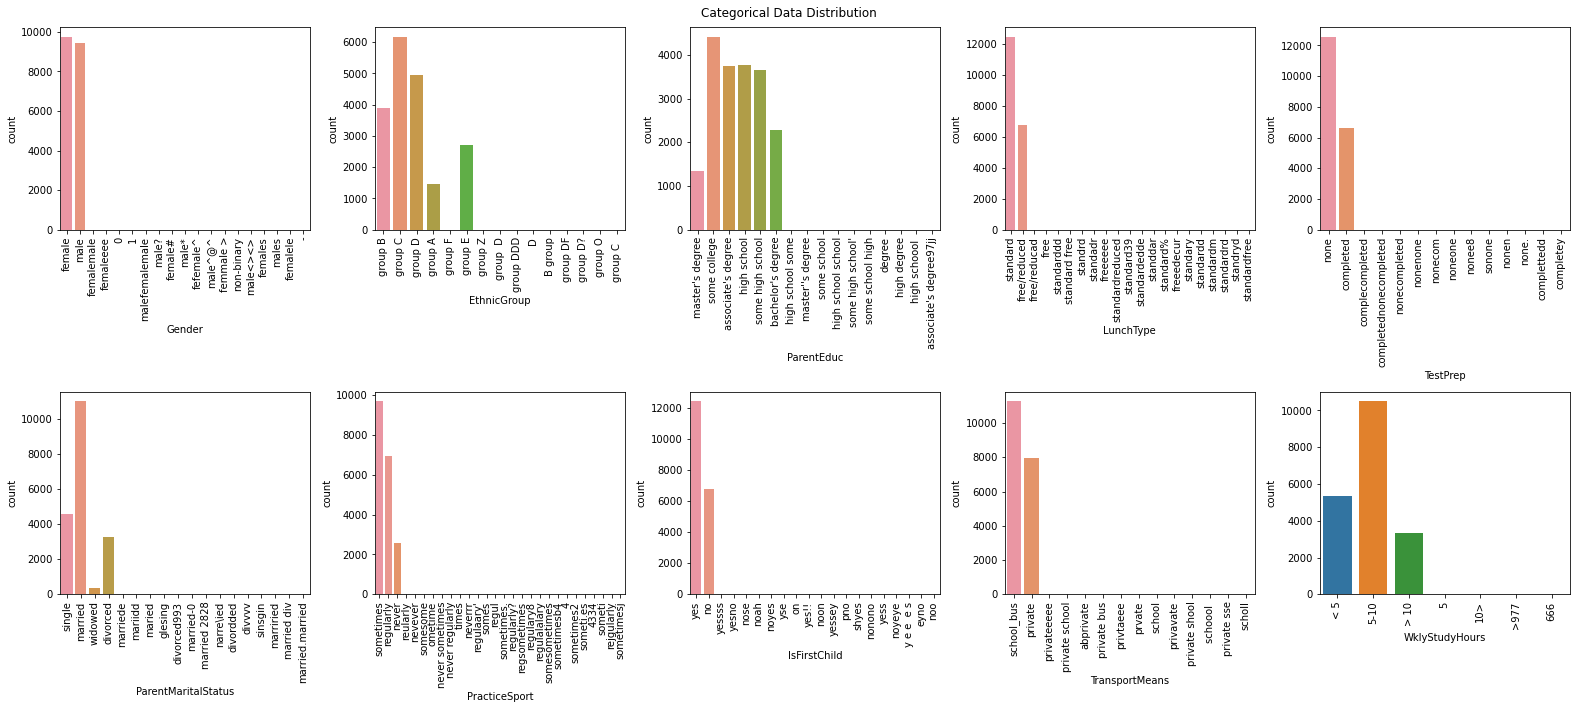

In [67]:
# visualize the distribution of categorical data

columns = ["Gender", "EthnicGroup", "ParentEduc", "LunchType", "TestPrep", "ParentMaritalStatus",
           "PracticeSport", "IsFirstChild", "TransportMeans", "WklyStudyHours"]

fig, axes = plt.subplots(2, 5, figsize=(22, 10))
for col, ax in zip(columns, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

plt.suptitle('Categorical Data Distribution')
plt.tight_layout()
plt.show();

In [68]:
# keep only rows that have valid values in each of categorical columns

df = df[df["Gender"].isin(["female", "male"])]
df = df[df["EthnicGroup"].isin(["group A", "group B", "group C", "group D", "group E"])]
df = df[df["ParentEduc"].isin(["bachelor's degree", "some college", "master's degree", "associate's degree",
                                                    "high school", "some high school"])]
df = df[df["LunchType"].isin(["standard", "free/reduced"])]
df = df[df["TestPrep"].isin(["none", "completed"])]
df = df[df["ParentMaritalStatus"].isin(['married', 'single', 'widowed', 'divorced'])]
df = df[df["PracticeSport"].isin(['regularly', 'sometimes', 'never'])]
df = df[df["IsFirstChild"].isin(["yes", "no"])]
df = df[df["TransportMeans"].isin(['school_bus', 'private'])]
df = df[df["WklyStudyHours"].isin(['< 5', '5-10', '> 10'])]

In [69]:
# Check again the total of data
# Data is reduced by 149 from the previous process

df.shape

(19055, 14)

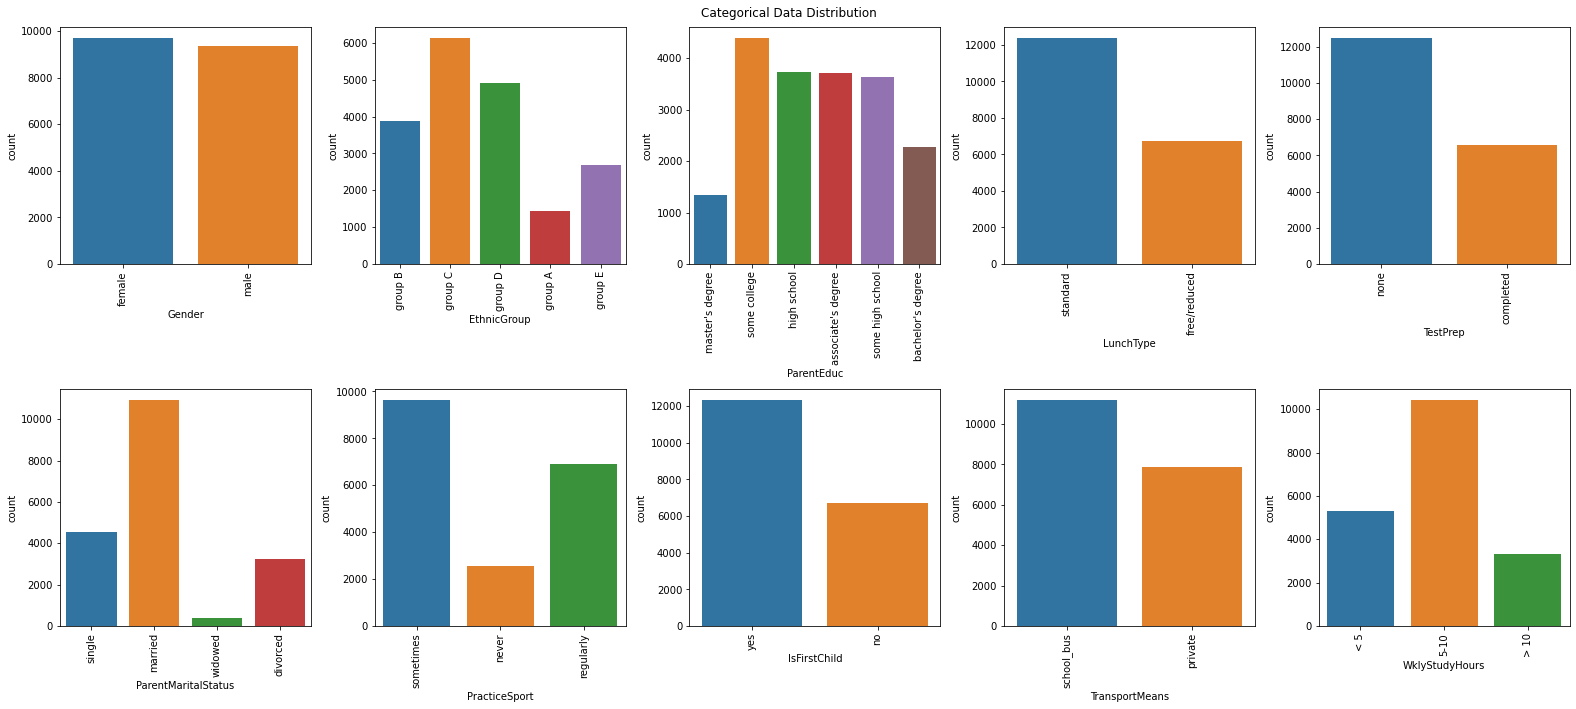

In [70]:
# Visualize the distribution of categorical data

columns = ["Gender", "EthnicGroup", "ParentEduc", "LunchType", "TestPrep", "ParentMaritalStatus",
           "PracticeSport", "IsFirstChild", "TransportMeans", "WklyStudyHours"]

fig, axes = plt.subplots(2, 5, figsize=(22, 10))
for col, ax in zip(columns, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

plt.suptitle('Categorical Data Distribution')
plt.tight_layout()
plt.show();

### Step 7. Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns = ["EthnicGroup", "Gender", "ParentEduc", "LunchType", "TestPrep", 
           "ParentMaritalStatus", "PracticeSport", "IsFirstChild", 
           "TransportMeans", "WklyStudyHours"]

label_encoder = LabelEncoder()

# Create a dictionary to store the mappings
label_mappings = {}

# Loop through each column and apply LabelEncoder
for col in columns:
    # Fit and transform the column
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping of original labels to encoded values
    label_mappings[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Print the mappings for each column
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for EthnicGroup: {'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4}
Mapping for Gender: {'female': 0, 'male': 1}
Mapping for ParentEduc: {"associate's degree": 0, "bachelor's degree": 1, 'high school': 2, "master's degree": 3, 'some college': 4, 'some high school': 5}
Mapping for LunchType: {'free/reduced': 0, 'standard': 1}
Mapping for TestPrep: {'completed': 0, 'none': 1}
Mapping for ParentMaritalStatus: {'divorced': 0, 'married': 1, 'single': 2, 'widowed': 3}
Mapping for PracticeSport: {'never': 0, 'regularly': 1, 'sometimes': 2}
Mapping for IsFirstChild: {'no': 0, 'yes': 1}
Mapping for TransportMeans: {'private': 0, 'school_bus': 1}
Mapping for WklyStudyHours: {'5-10': 0, '< 5': 1, '> 10': 2}


In [72]:
# Check the type of data that has been encoded
# The type is changed from object to int32

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19055 entries, 2 to 30639
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               19055 non-null  int32
 1   EthnicGroup          19055 non-null  int32
 2   ParentEduc           19055 non-null  int32
 3   LunchType            19055 non-null  int32
 4   TestPrep             19055 non-null  int32
 5   ParentMaritalStatus  19055 non-null  int32
 6   PracticeSport        19055 non-null  int32
 7   IsFirstChild         19055 non-null  int32
 8   NrSiblings           19055 non-null  int64
 9   TransportMeans       19055 non-null  int32
 10  WklyStudyHours       19055 non-null  int32
 11  MathScore            19055 non-null  int64
 12  ReadingScore         19055 non-null  int64
 13  WritingScore         19055 non-null  int64
dtypes: int32(10), int64(4)
memory usage: 2.0 MB


### Step 8. Correlation Heatmap

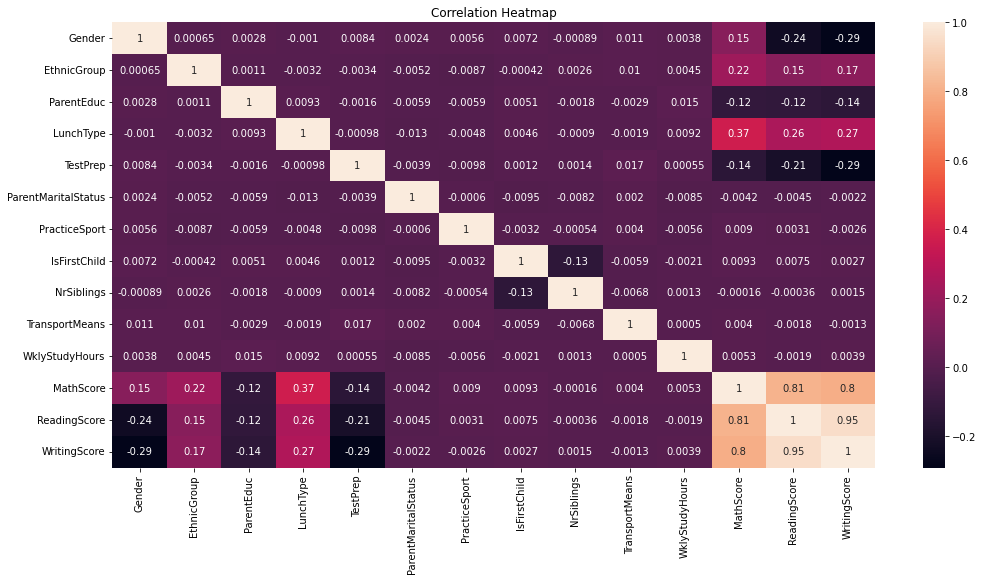

In [73]:
# Create correlation heatmap to get correlation between features

correlation = df.corr(method='spearman')

plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()

### Step 9. Save the Preprocessed Data

In [74]:
df.to_csv('cleaned_data.csv', index=False)